In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import normalize

/home/arpit/workspace/arpit/experimental/lda-restaurants-classification/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
data = {
    'restaurant_name': [
        'Italian Delight', 'Pasta Paradise', 'Pizza Palace',
        'Sushi Express', 'Tokyo Bites', 'Wasabi House',
        'Taco Time', 'Mexican Fiesta', 'Burrito Bros',
        'Burger Joint', 'Grill House', 'Steak & Fries',
        'Veggie Garden', 'Green Plate', 'Salad Stop'
    ],
    'menu': [
        'spaghetti pasta lasagna pizza garlic bread tiramisu cannoli wine',
        'fettuccine alfredo ravioli carbonara gnocchi pizza bruschetta gelato',
        'margherita pizza pepperoni pizza vegetarian pizza calzone garlic knots wine',
        'sushi sashimi maki rolls tempura miso soup sake green tea',
        'ramen sushi nigiri sake tempura edamame green tea mochi',
        'sashimi rolls wasabi tuna salmon eel udon miso sake',
        'tacos burritos enchiladas guacamole salsa margarita churros',
        'nachos quesadillas fajitas salsa beans rice tequila tres leches',
        'burritos tacos quesadillas chili tortilla chips guacamole horchata',
        'burgers fries shakes onion rings soda milkshake ice cream',
        'steak burger ribs fries coleslaw beer cheesecake',
        'steaks prime rib bbq fries salad beer cobbler',
        'salad tofu veggie burger falafel hummus smoothies fruit bowl',
        'quinoa bowl vegetable curry lentil soup smoothies avocado toast tea',
        'caesar salad greek salad kale smoothies wraps avocado kombucha'
    ]
}

In [3]:
# creates a pandas DataFrame from the data dictionary
# two columns: 'restaurant_name' and 'menu'
# Each row represents one restaurant with its menu items as text
df = pd.DataFrame(data)

# creates a CountVectorizer object which will convert text documents to a matrix of token counts
# [[0 1 1 1 0 0 1 0 1]
# [0 2 0 1 0 1 1 0 1]
# [1 0 0 1 1 0 1 1 1]
# [0 1 1 1 0 0 1 0 1]]
# each row is document. each column is a word. the value denotes the frequency of presence.
vectorizer = CountVectorizer(stop_words='english', min_df=1)

# transforms the 'menu' column (which contains text) into a document-term matrix
X = vectorizer.fit_transform(df['menu'])

In [4]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['alfredo', 'avocado', 'bbq', 'beans', 'beer', 'bowl', 'bread',
       'bruschetta', 'burger', 'burgers', 'burritos', 'caesar', 'calzone',
       'cannoli', 'carbonara', 'cheesecake', 'chili', 'chips', 'churros',
       'cobbler', 'coleslaw', 'cream', 'curry', 'edamame', 'eel',
       'enchiladas', 'fajitas', 'falafel', 'fettuccine', 'fries', 'fruit',
       'garlic', 'gelato', 'gnocchi', 'greek', 'green', 'guacamole',
       'horchata', 'hummus', 'ice', 'kale', 'knots', 'kombucha',
       'lasagna', 'leches', 'lentil', 'maki', 'margarita', 'margherita',
       'milkshake', 'miso', 'mochi', 'nachos', 'nigiri', 'onion', 'pasta',
       'pepperoni', 'pizza', 'prime', 'quesadillas', 'quinoa', 'ramen',
       'ravioli', 'rib', 'ribs', 'rice', 'rings', 'rolls', 'sake',
       'salad', 'salmon', 'salsa', 'sashimi', 'shakes', 'smoothies',
       'soda', 'soup', 'spaghetti', 'steak', 'steaks', 'sushi', 'tacos',
       'tea', 'tempura', 'tequila', 'tiramisu', 'toast', 'tofu',
       'tort

In [5]:
# number of topics we think there are
# We expect to see Italian, Japanese, Mexican, American, Vegetarian
n_topics = 5

In [6]:
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='online',
    random_state=0,
    n_jobs=-1
)
lda.fit(X)
topic_probs = lda.transform(X)

/home/arpit/workspace/arpit/experimental/lda-restaurants-classification/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/arpit/workspace/arpit/experimental/lda-restaurants-classification/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/arpit/workspace/arpit/experimental/lda-restaurants-classification/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xc

In [7]:
topic_probs

array([[0.91948618, 0.02007793, 0.02028546, 0.02007392, 0.02007651],
       [0.9106998 , 0.02229708, 0.02239665, 0.02229766, 0.0223088 ],
       [0.01837412, 0.01823629, 0.92692635, 0.01822854, 0.01823471],
       [0.01820999, 0.01867488, 0.92628791, 0.01858466, 0.01824257],
       [0.02002095, 0.91962023, 0.02022499, 0.02009108, 0.02004275],
       [0.0200192 , 0.02009565, 0.02014998, 0.91969397, 0.0200412 ],
       [0.0251613 , 0.02505011, 0.02507593, 0.02504552, 0.89966713],
       [0.02008642, 0.02007292, 0.91959679, 0.02006343, 0.02018045],
       [0.91022557, 0.02231393, 0.02235181, 0.02231282, 0.02279588],
       [0.91973334, 0.02007349, 0.02003945, 0.02007488, 0.02007885],
       [0.89973381, 0.02507413, 0.02504396, 0.02506759, 0.02508052],
       [0.91078242, 0.02229299, 0.02233787, 0.02229299, 0.02229374],
       [0.91947249, 0.02006296, 0.02031887, 0.0200732 , 0.02007247],
       [0.01826845, 0.01826769, 0.92699814, 0.01823148, 0.01823425],
       [0.02015895, 0.02005181, 0.

In [8]:
topic_probs.argmax(axis=1)

array([0, 0, 2, 2, 1, 3, 4, 2, 0, 0, 0, 0, 0, 2, 2])

In [9]:
df['dominant_topic'] = topic_probs.argmax(axis=1)

In [10]:
# Print top words for each topic
n_top_words = 8
for topic_idx, topic in enumerate(lda.components_):
    message = f"Topic #{topic_idx}: "
    message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)

Topic #0: fries salad pizza burger beer carbonara bbq alfredo
Topic #1: sake ramen green edamame nigiri tempura mochi sushi
Topic #2: pizza tea soup smoothies salad avocado tequila rolls
Topic #3: udon sake miso salmon sashimi tuna eel wasabi
Topic #4: churros tacos enchiladas margarita guacamole burritos salsa shakes


In [11]:
for topic_idx in range(n_topics):
    restaurants = df[df['dominant_topic'] == topic_idx]['restaurant_name'].tolist()
    print(f"Topic #{topic_idx} Restaurants: {', '.join(restaurants)}")

Topic #0 Restaurants: Italian Delight, Pasta Paradise, Burrito Bros, Burger Joint, Grill House, Steak & Fries, Veggie Garden
Topic #1 Restaurants: Tokyo Bites
Topic #2 Restaurants: Pizza Palace, Sushi Express, Mexican Fiesta, Green Plate, Salad Stop
Topic #3 Restaurants: Wasabi House
Topic #4 Restaurants: Taco Time


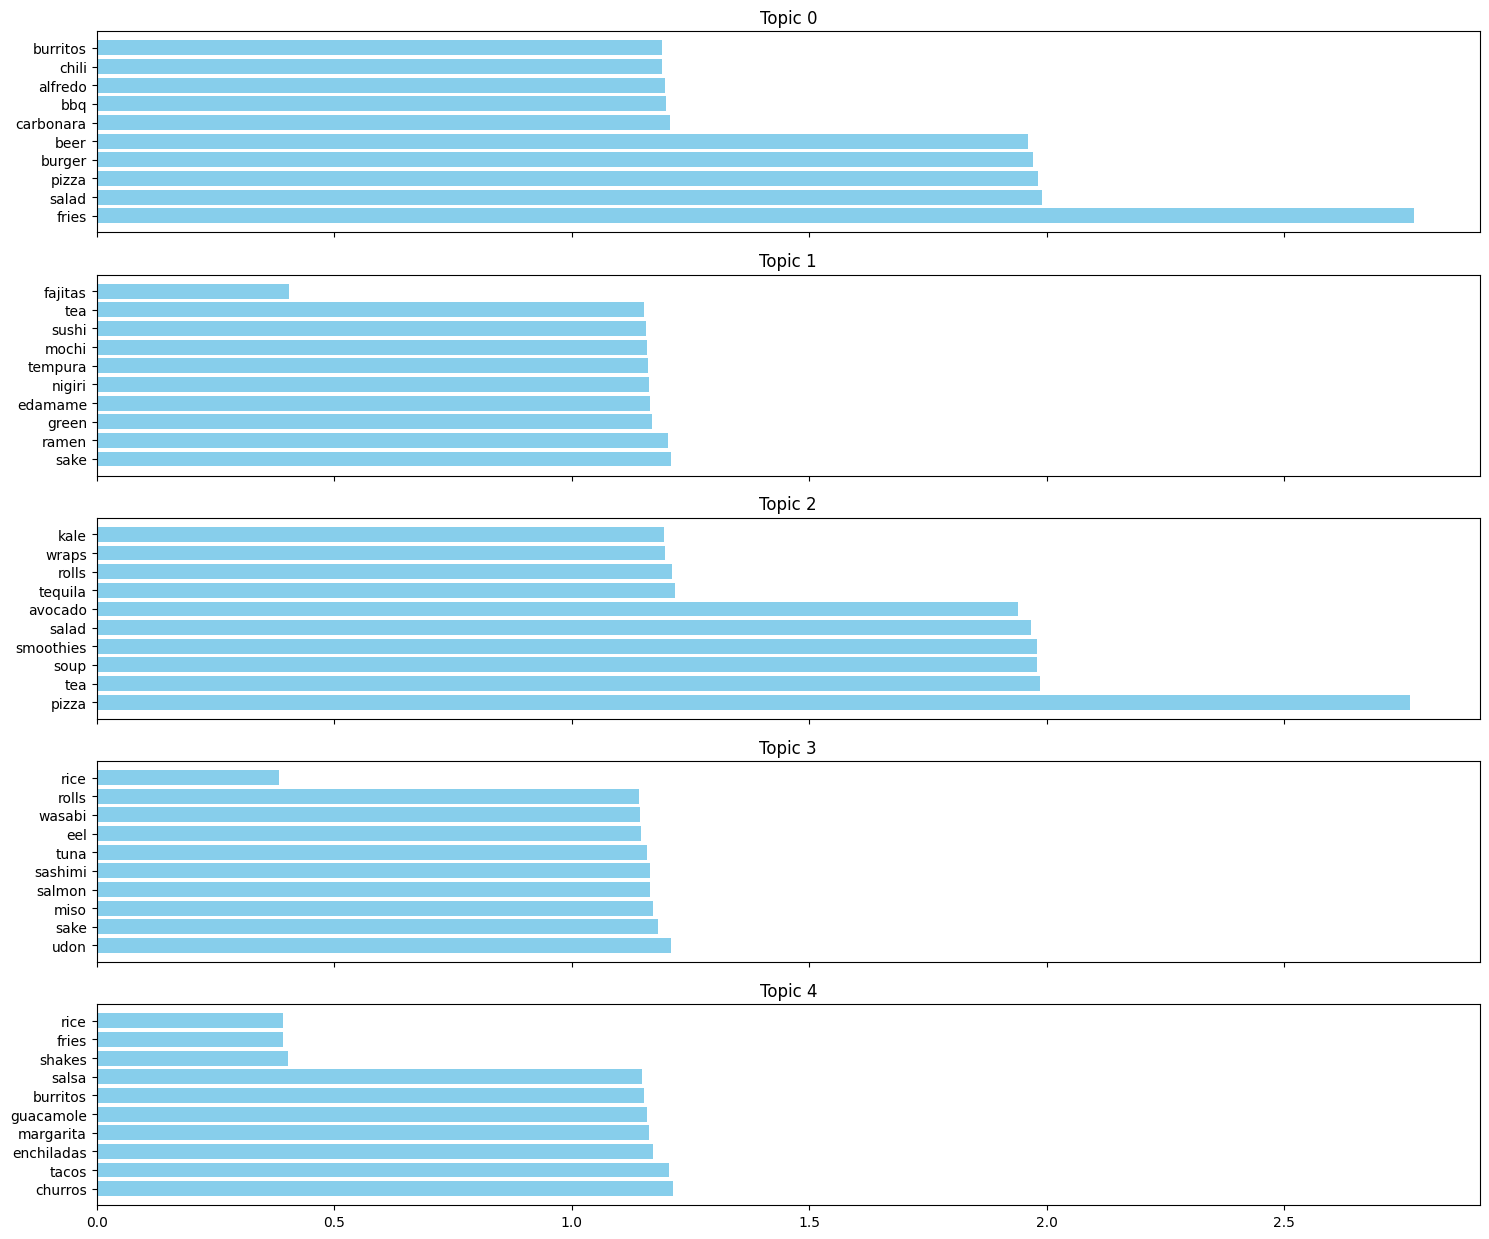

In [12]:
n_top_words = 10
fig, axes = plt.subplots(n_topics, 1, figsize=(15, n_topics * 2.5), sharex=True)

for i, (topic_dist, ax) in enumerate(zip(lda.components_, axes)):
    top_word_indices = topic_dist.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_weights = [topic_dist[idx] for idx in top_word_indices]
    
    ax.barh(top_words, top_weights, color='skyblue')
    ax.set_title(f'Topic {i}', fontsize=12)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()

In [13]:
# Show the results
print("Restaurants and their dominant topics:")
for _, row in df.iterrows():
    print(f"{row['restaurant_name']} -> Topic #{row['dominant_topic']}")

Restaurants and their dominant topics:
Italian Delight -> Topic #0
Pasta Paradise -> Topic #0
Pizza Palace -> Topic #2
Sushi Express -> Topic #2
Tokyo Bites -> Topic #1
Wasabi House -> Topic #3
Taco Time -> Topic #4
Mexican Fiesta -> Topic #2
Burrito Bros -> Topic #0
Burger Joint -> Topic #0
Grill House -> Topic #0
Steak & Fries -> Topic #0
Veggie Garden -> Topic #0
Green Plate -> Topic #2
Salad Stop -> Topic #2
